[Dataset](https://www.google.com/url?q=https://www.kaggle.com/datasets/imranbukhari/comprehensive-ethusd-1m-data/data&sa=D&source=docs&ust=1730502587695059&usg=AOvVaw3kMqZe-yQhr2LT-L_PQyeM)

In [1]:
### download dataset to colab
#!/bin/bash
!curl -L -o archive.zip\
https://www.kaggle.com/api/v1/datasets/download/imranbukhari/comprehensive-ethusd-1m-data
!unzip archive.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  728M  100  728M    0     0  13.3M      0  0:00:54  0:00:54 --:--:-- 11.9M
Archive:  archive.zip
  inflating: ETHUSD_1m_Binance.csv   
  inflating: ETHUSD_1m_BitMEX.csv    
  inflating: ETHUSD_1m_Bitfinex.csv  
  inflating: ETHUSD_1m_Bitstamp.csv  
  inflating: ETHUSD_1m_Coinbase.csv  
  inflating: ETHUSD_1m_Combined_Index.csv  
  inflating: ETHUSD_1m_KuCoin.csv    
  inflating: ETHUSD_1m_OKX.csv       


In [9]:
### import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
### read data files
common_columns = ['Open time', 'Open', 'High', 'Low', 'Volume', 'Close']
dataset_files = [
    'ETHUSD_1m_Binance.csv',
    'ETHUSD_1m_BitMEX.csv',
    'ETHUSD_1m_Bitfinex.csv',
    'ETHUSD_1m_Bitstamp.csv',
    'ETHUSD_1m_Coinbase.csv',
    'ETHUSD_1m_Combined_Index.csv',
    'ETHUSD_1m_KuCoin.csv',
    'ETHUSD_1m_OKX.csv'
]

dataframes = []

for filename in dataset_files:
  df = pd.read_csv(filename)[common_columns]
  dataframes.append(df)
  print(filename)
  print(f'shape: {df.shape}')

ETHUSD_1m_Binance.csv
shape: (3783665, 6)
ETHUSD_1m_BitMEX.csv
shape: (3287989, 6)
ETHUSD_1m_Bitfinex.csv
shape: (3470735, 6)
ETHUSD_1m_Bitstamp.csv
shape: (7581664, 6)
ETHUSD_1m_Coinbase.csv
shape: (4138255, 6)
ETHUSD_1m_Combined_Index.csv
shape: (4222723, 6)
ETHUSD_1m_KuCoin.csv
shape: (3332962, 6)
ETHUSD_1m_OKX.csv
shape: (3580184, 6)


In [11]:
### concat dataframes
df = pd.concat(dataframes, ignore_index=True)
df

,Open time,Open,High,Low,Volume,Close
0,2017-08-17 04:00:00,301.13,301.13,301.13,0.426430,301.13
1,2017-08-17 04:01:00,301.13,301.13,301.13,2.757870,301.13
2,2017-08-17 04:02:00,300.00,300.00,300.00,0.099300,300.00
3,2017-08-17 04:03:00,300.00,300.00,300.00,0.313890,300.00
4,2017-08-17 04:04:00,301.13,301.13,301.13,0.232020,301.13
...,...,...,...,...,...,...
33398172,2024-11-01 16:51:00,2516.84,2522.63,2516.84,20.079580,2522.51
33398173,2024-11-01 16:52:00,2522.50,2522.50,2518.61,11.155204,2519.31
33398174,2024-11-01 16:53:00,2519.30,2520.85,2518.61,18.232016,2519.78
33398175,2024-11-01 16:54:00,2519.79,2520.21,2518.60,29.394133,2519.40


In [12]:
# Shape of data
print(f'shape of data: {df.shape}')

shape of data: (33398177, 6)


In [13]:
descriptions = [
    'The timestamp, in UTC date format, when the candlestick (price bar) opens.',
    'The price of the asset at the beginning of the trading period.',
    'The highest price of the asset during the trading period.',
    'The lowest price of the asset during the trading period.',
    'The price of the asset at the end of the trading period.',
    'The price of the asset at the end of the trading period.'
]


info_table = pd.DataFrame({
    "Data Type": df.dtypes,
    "Null Count": df.isna().sum(),
    'Description': descriptions
})

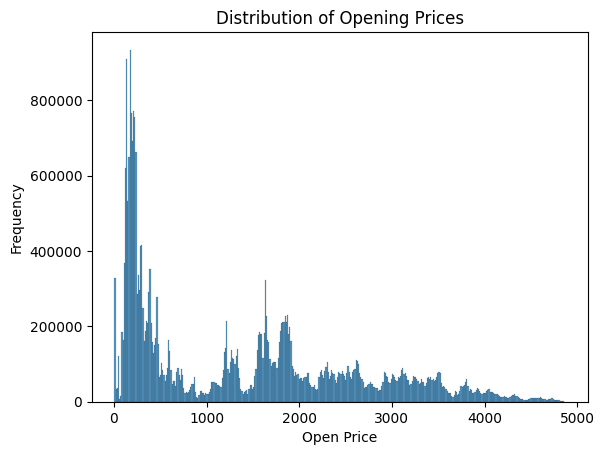

In [14]:
sns.histplot(data= df, x = 'Open')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()

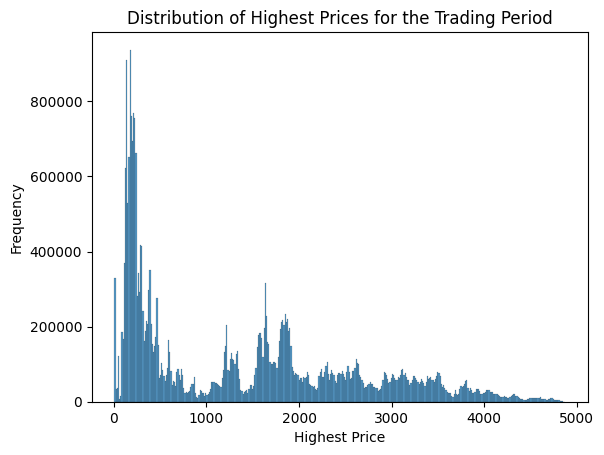

In [15]:
sns.histplot(data= df, x = 'High')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Highest Prices for the Trading Period')
plt.show()

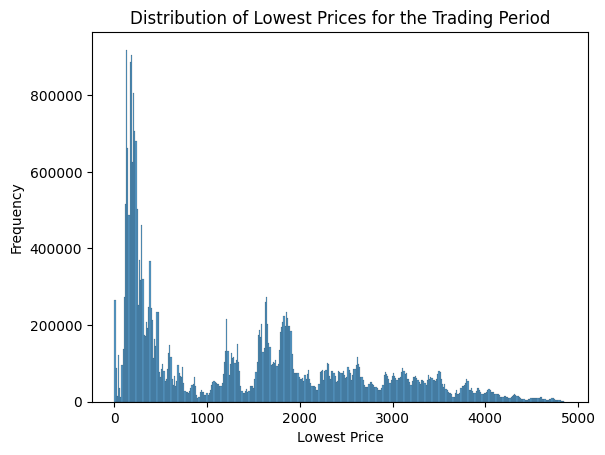

In [16]:
sns.histplot(data= df, x = 'Low')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Lowest Prices for the Trading Period')
plt.show()

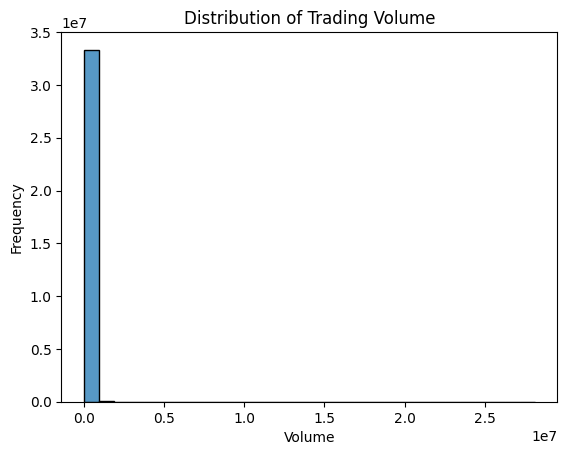

In [17]:
sns.histplot(data= df, x = 'Volume', bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

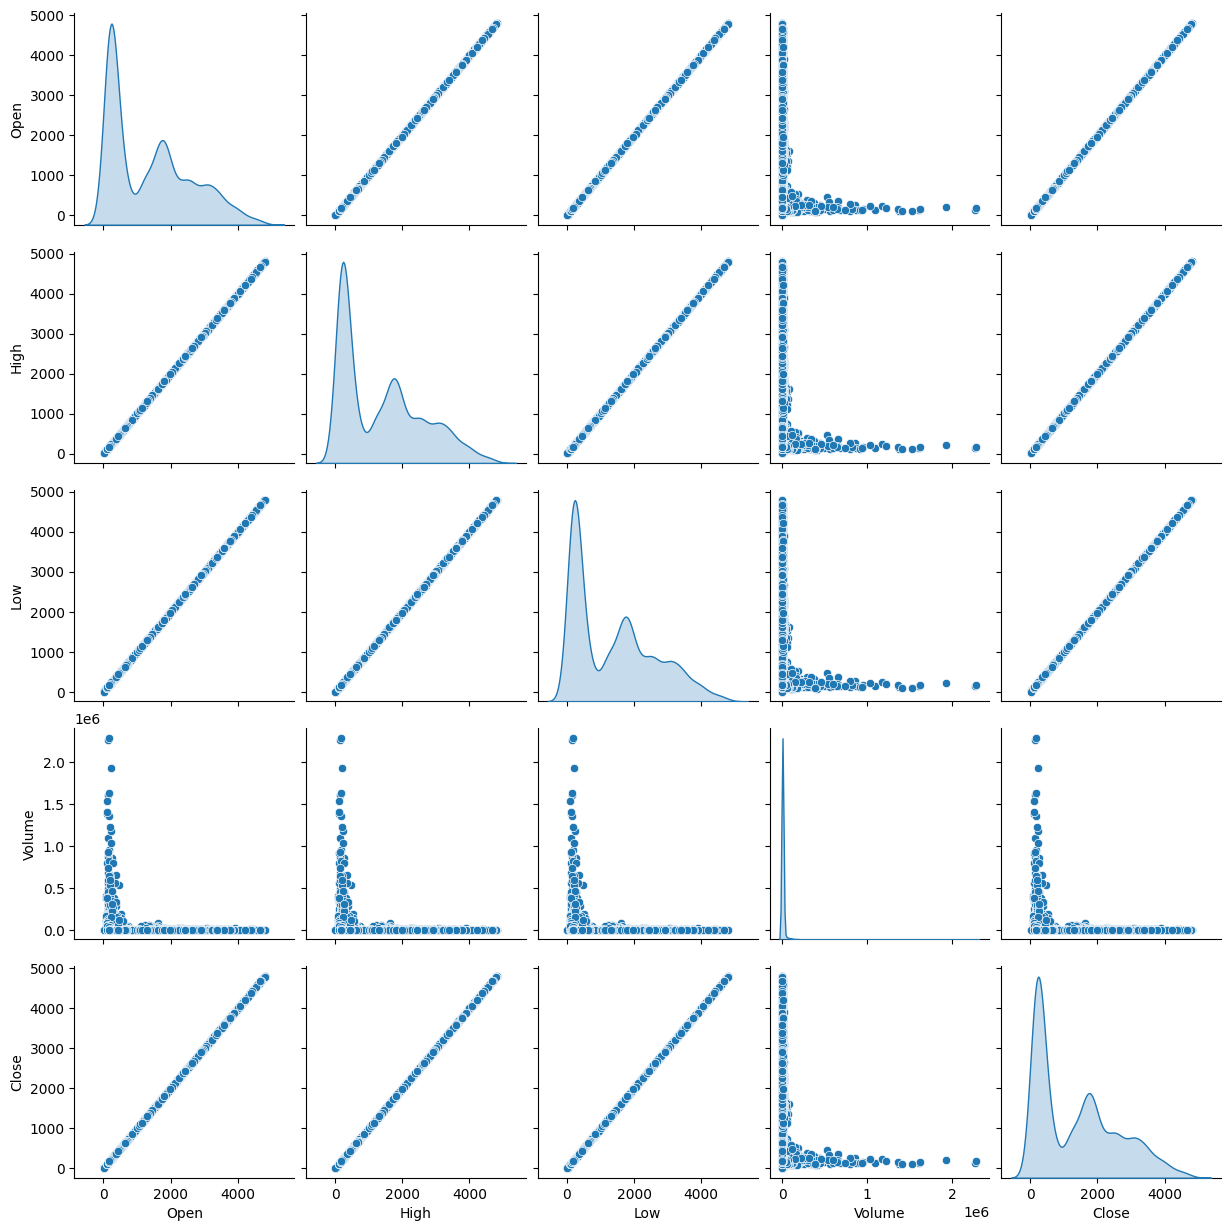

In [18]:
df_sampled = df.sample(n=10000, random_state=1)
sns.pairplot(df_sampled.drop(columns=['Open time']), diag_kind='kde')
plt.show()